# Ejercicios Repaso

## Ejercicio 1: 

A: Descarga el dataset de Iris de sklearn y transformalo en un dataframe de pandas.

B: Utiliza una técnica de reducción de dimensión (PCA) sobre las variables explicativas y visualiza los datos en 2 dimensiones. ¿ Qué visualización es la más adecuada para este caso concreto?

C: Construye un modelo de clasificación lineal. Evalúa las métricas más importantes. Crea una visualización para la matriz de confusión.

In [64]:
# A - Descarga el dataset de iris de sklearn y transformarlo en un df de pandas. 
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd

# Cargar el conjunto de datos Iris 
iris_data = load_iris()

# Convertir los datos y las etiquetas en un DF de pandas 
df = pd.DataFrame(data = iris_data['data'], columns=iris_data['feature_names'])
df['target'] = iris_data['target']

# Mostrar las primeras filas del DF 
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


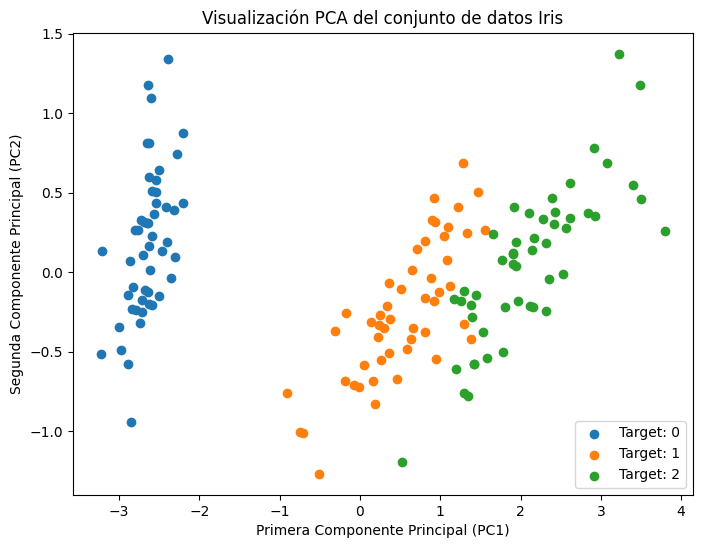

In [65]:
# B: Utiliza una técnica de reducción de dimensión (PCA) sobre las variables explicativas 
# y visualiza los datos en 2 dimensiones. 
# ¿Qué visualización es la más adecuada para este caso concreto?

# Importar las bibliotecas necesarias 
from sklearn.decomposition import PCA # Es una tecnica para reducir dimensionalidad de un conjunto de datos. 
import matplotlib.pyplot as plt 

# Separar las variables explicativeas (features) y las variables objetivo (target)
X = df.iloc[:,:-1] # Obtienes todo el dataset salvo la última columna. 
y = df['target']

# Aplicar PCA 
pca = PCA(n_components=2) # Esto nos dice que queremos reducir el dataset a 2 componentes principales. 
X_pca = pca.fit_transform(X) # Fits the PCA model to the data in 'X'. Datos transformados en los dos componentes principales. 

# Crear un DataFrame para los datos transformados 
df_pca = pd.DataFrame(data = X_pca, columns=['PC1', 'PC2']) # Dimensionalidad reducida.
df_pca['target'] = y

# Visualizar los datos en 2D
plt.figure(figsize=(8,6))
for target in set(y):
    indices = df_pca['target'] == target
    plt.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], label = f"Target: {target}")

plt.xlabel('Primera Componente Principal (PC1)')
plt.ylabel('Segunda Componente Principal (PC2)')
plt.legend()
plt.title('Visualización PCA del conjunto de datos Iris')
plt.show()

In [66]:
# C. Construye un modelo de clasificación lineal. Evalúa las métricas más importantes. 
# Crea una visualización para la matriz de confusión.

# Vamos a tirar por un modelo de Regresion Logistica. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Separamos los datos 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

La precisión del modelo es: 1.0
Reporte de Clasificación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



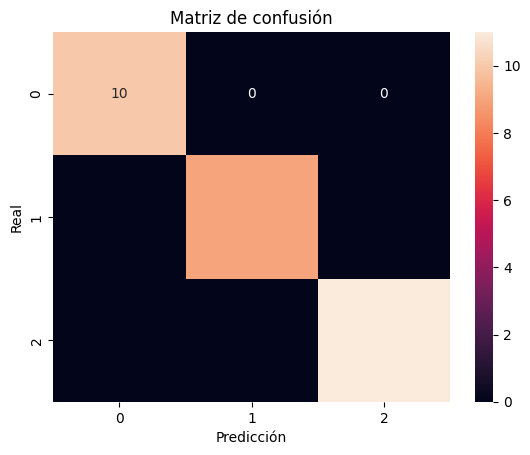

0.9583333333333334 1.0 [0.93333333 1.         0.93333333 0.93333333 1.        ]


In [67]:
# Inicializar y entrenar el modelo 
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones 
y_pred = model.predict(X_test)

# Calculo de la precisión 
acc = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {acc}")

# Generar el reporte de clasificación 
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación")
print(report)

#Calcular la matriz de confusión 
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

#### Verificacion de overfitting ####
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_pca, y, cv = 5)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(train_score, test_score, scores)

## Ejercicio 2

A: Descarga y lee el dataset contenido en el siguiente enlace. https://www.kaggle.com/camnugent/california-housing-prices

B: Realiza un análisis exploratorio de los datos con los siguientes objetivos:

- Indica si hay o no valores desconocidos.
- Realiza una visualización de la matriz de correlaciones.
- Visualiza la relación que existe entre la proximidad al oceano con el precio mediano de la casa. ¿Indica que tipo de visualización quieres utilizar y por qué?
- ¿Cómo afecta el número total de dormitorios al precio mediano de la casa ? Crea una gráfica que muestre la relación entre ambas variables.

C: Construye un modelo de regresión usando árboles para predecir el precio mediano de la casa. ¿Cuáles son las variables más importantes del modelo? Monta una gráfica que lo muestre.

D: Evalúa el modelo anterior y saca las métricas más relevantes que consideres. ¿Qué interpretación puedes sacar del modelo anterior con todo lo recopilado?



In [68]:
#A. Descarga y lee el dataset contenido en el enlace
import pandas as pd 
df = pd.read_csv('housing.csv')
df.shape
df.describe
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85    

<Axes: xlabel='longitude', ylabel='latitude'>

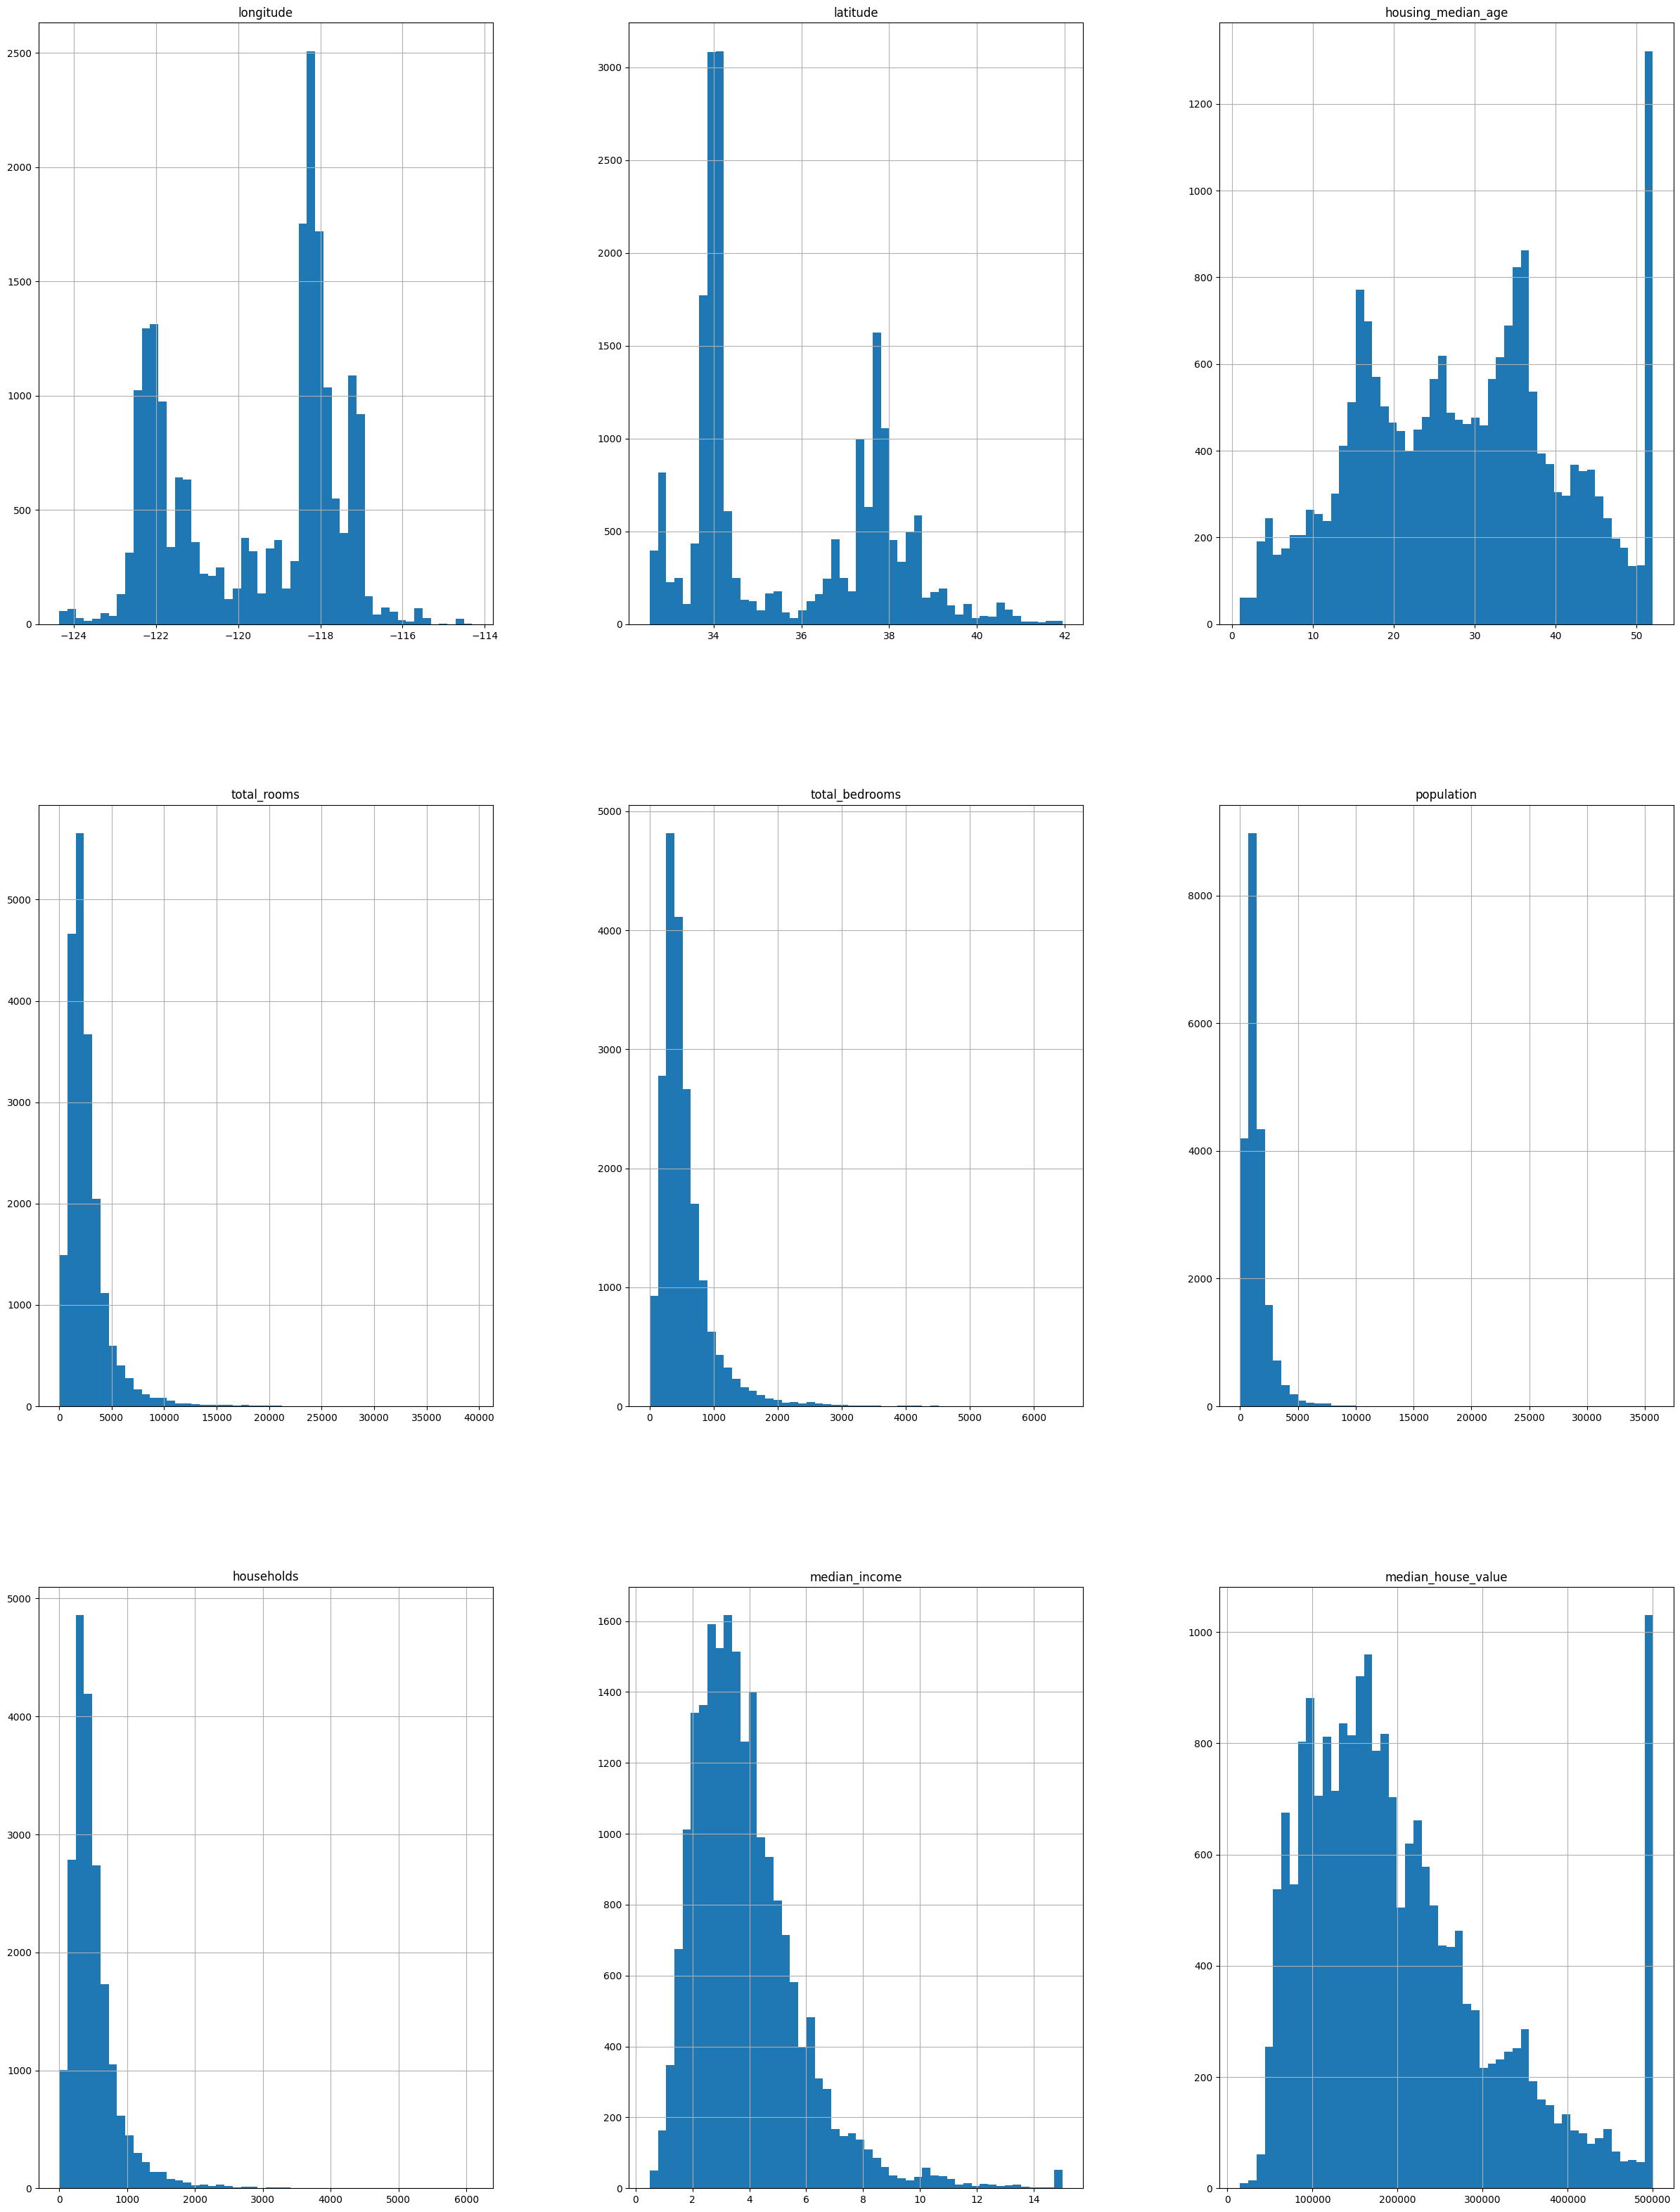

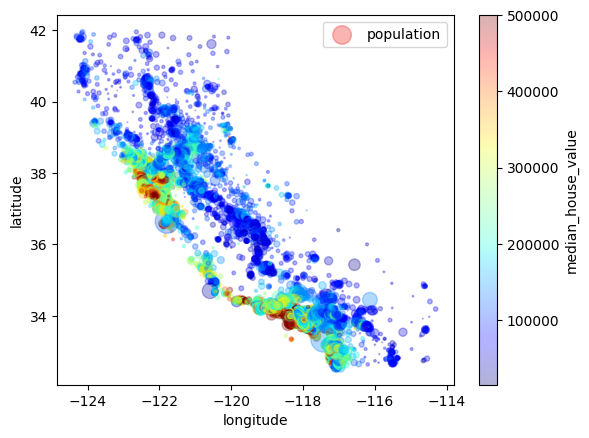

In [69]:
df.hist(bins=50, figsize=(30,40))
df.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.3, s=df["population"]/100, label = "population", c="median_house_value", cmap = plt.get_cmap("jet"))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88

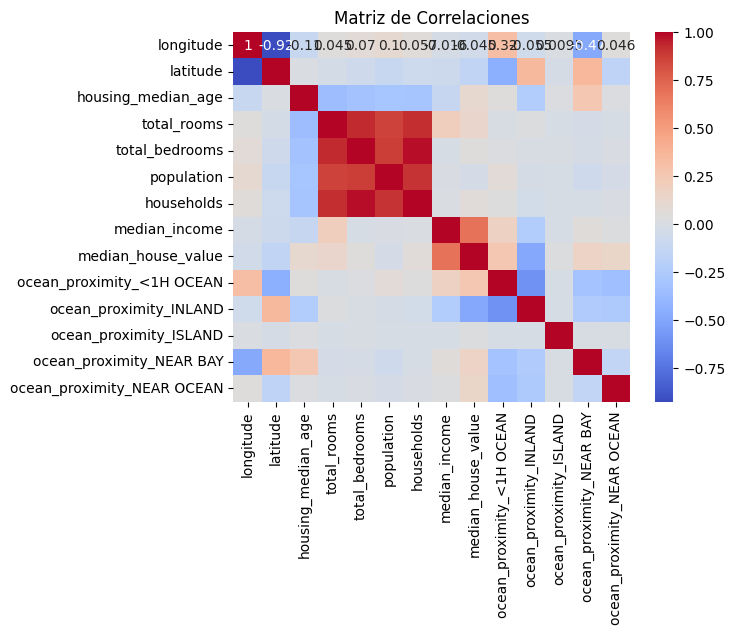

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


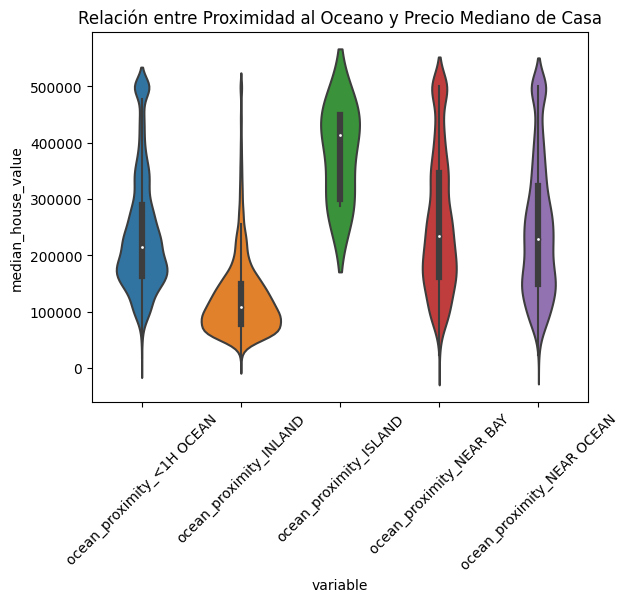

El gráfico de violín es probablemente la opción más relevante para entender tanto la distribución 
como la densidad de la variable 'median_house_value' en relación con las diferentes categorías de 'ocean_proximity'.
Combina lo mejor de los diagramas de caja y los diagramas de densidad en un solo gráfico, lo cual lo hace informativo 
y eficiente para este tipo de análisis.


In [70]:
# B: Realiza un análisis exploratorio de los datos con los siguientes objetivos:
# 1. Indica si hay o no valores desconocidos.
# 2. Realiza una visualización de la matriz de correlaciones.
# 3. Visualiza la relación que existe entre la proximidad al oceano con el precio mediano de la casa. ¿Indica que tipo de visualización quieres utilizar y por qué?
# 4. ¿Cómo afecta el número total de dormitorios al precio mediano de la casa ? Crea una gráfica que muestre la relación entre ambas variables.

# 1. Verificar si hay valores desconocidos 
print(df.isna().sum())
print(df[df.isna().any(axis=1)]) # Observar las filas que contienen las NA's antes de borrarlas. 
df.dropna(inplace=True)

# 2. Realizar una matriz para observar si existen correlaciones 
import seaborn as sns 
import matplotlib.pyplot as plt 
print(df['ocean_proximity'].unique())
print(df['ocean_proximity'].value_counts())

# Calcular la matriz de correlación haciendo las que son strings en este caso, vars. categoricas 
df_dummies = pd.get_dummies(df, columns=['ocean_proximity'])
corr_matrix = df_dummies.corr()

# Dibujamos el heatmap 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

# 3. Visualizar la relación que existe entre la proximidad al oceano con el precio mediano de la casa. 
# Como ocean_proximity es una variable de dummies, debemos de hacer el metling para poder hacer la función de violin. 
df_melted = pd.melt(df_dummies, id_vars=['median_house_value'], value_vars=['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'])
sns.violinplot(x='variable', y='median_house_value', data=df_melted[df_melted['value']== 1])
plt.title('Relación entre Proximidad al Oceano y Precio Mediano de Casa')
plt.xticks(rotation=45) # Rotacion de 90 grados para las etiquetas del x-axis
plt.show()

print("""El gráfico de violín es probablemente la opción más relevante para entender tanto la distribución 
como la densidad de la variable 'median_house_value' en relación con las diferentes categorías de 'ocean_proximity'.
Combina lo mejor de los diagramas de caja y los diagramas de densidad en un solo gráfico, lo cual lo hace informativo 
y eficiente para este tipo de análisis.""")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


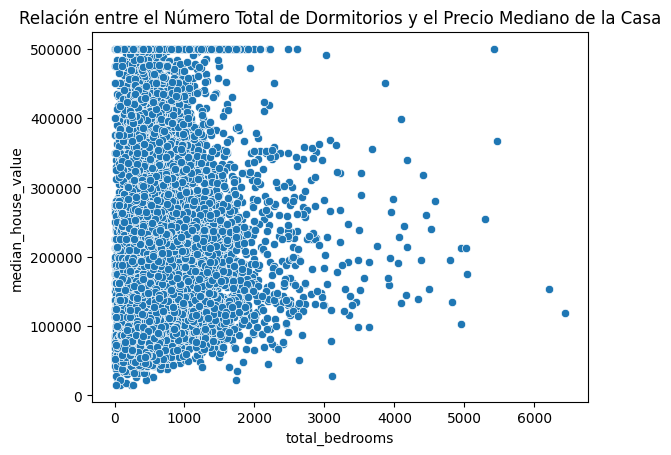

Podemos observar de este scatter plot, que no tiene sentido, que una casa tengo un total de mas de 6000 habitaciones.
Eso es debido a que estamos viendo la suma de ellas.
Por lo tanto, vamos a hacer una nueva columna con la media.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


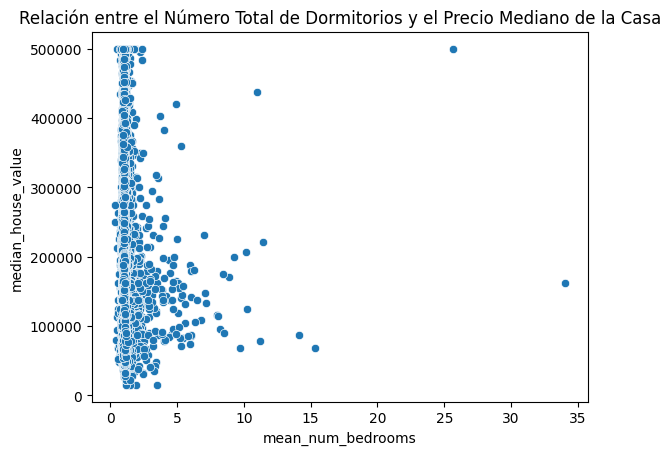

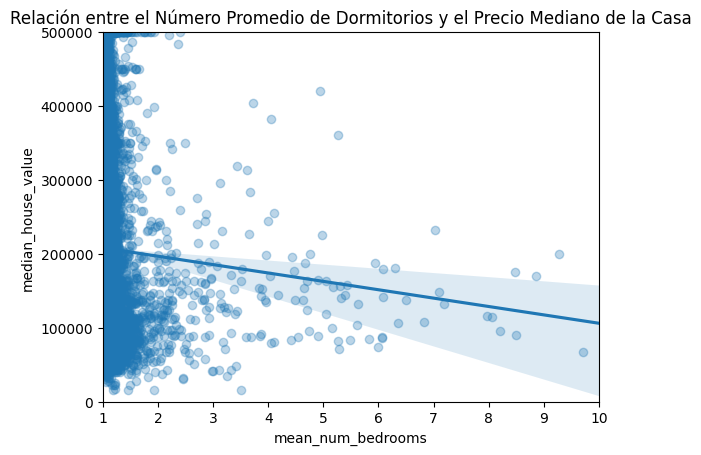

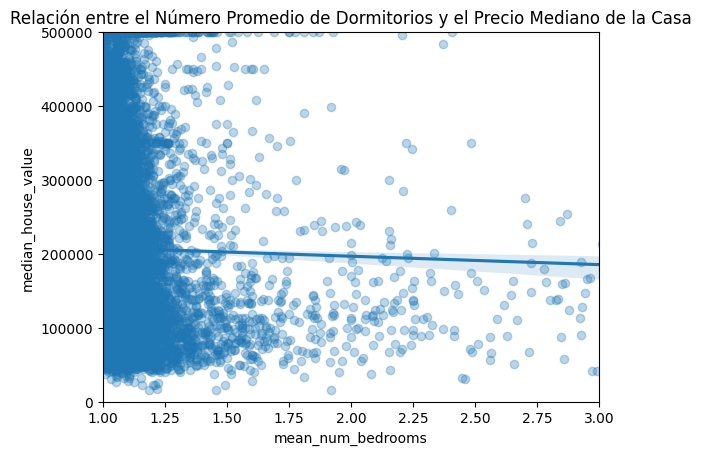

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

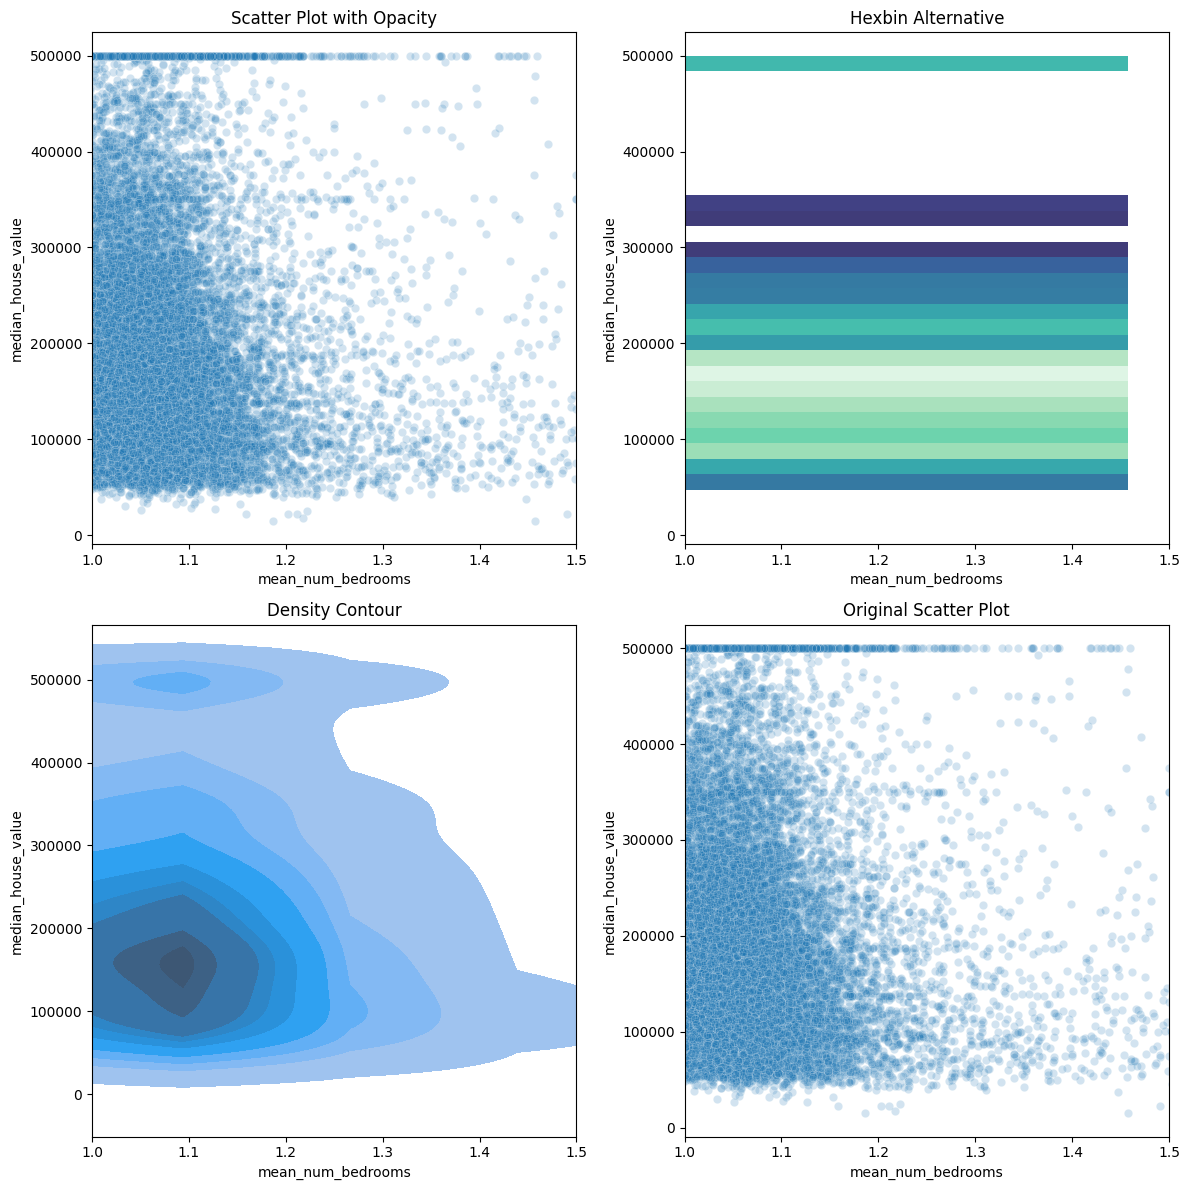

In [71]:
sns.scatterplot(x="total_bedrooms", y="median_house_value", data = df_dummies)
plt.title('Relación entre el Número Total de Dormitorios y el Precio Mediano de la Casa')
plt.show()
print("Podemos observar de este scatter plot, que no tiene sentido, que una casa tengo un total de mas de 6000 habitaciones.\nEso es debido a que estamos viendo la suma de ellas.\nPor lo tanto, vamos a hacer una nueva columna con la media.")

df_dummies['mean_num_bedrooms'] = df_dummies['total_bedrooms']/df_dummies['households']
sns.scatterplot(x='mean_num_bedrooms', y='median_house_value', data = df_dummies)
plt.title('Relación entre el Número Total de Dormitorios y el Precio Mediano de la Casa')
plt.show()

# Gráfico de dispersión con línea de regresión
sns.regplot(x='mean_num_bedrooms', y='median_house_value', data=df_dummies, scatter_kws={'alpha':0.3})
plt.title('Relación entre el Número Promedio de Dormitorios y el Precio Mediano de la Casa')
plt.xlim(1, 10)  # Limitar el rango del eje X
plt.ylim(0, 500000)
plt.show()

# Gráfico de dispersión con línea de regresión
sns.regplot(x='mean_num_bedrooms', y='median_house_value', data=df_dummies, scatter_kws={'alpha':0.3})
plt.title('Relación entre el Número Promedio de Dormitorios y el Precio Mediano de la Casa')
plt.xlim(1, 3)  # Limitar el rango del eje X
plt.ylim(0, 500000)
plt.show()


# Wow, esto es bien raro. ¿Como hay casas que acaban en 0.5 habitaciones?
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot scatter with reduced opacity on the top-left subplot
sns.scatterplot(x='mean_num_bedrooms', y='median_house_value', data=df_dummies, alpha=0.2, ax=axes[0, 0])
axes[0, 0].set_xlim(1, 1.5)
axes[0, 0].set_title('Scatter Plot with Opacity')

# Plot hexbin alternative on the top-right subplot
sns.histplot(x='mean_num_bedrooms', y='median_house_value', data=df_dummies, bins=30, pthresh=.1, cmap="mako", ax=axes[0, 1])
axes[0, 1].set_xlim(1, 1.5)
axes[0, 1].set_title('Hexbin Alternative')

# Plot density contour on the bottom-left subplot
sns.kdeplot(x='mean_num_bedrooms', y='median_house_value', data=df_dummies, fill=True, ax=axes[1, 0])
axes[1, 0].set_xlim(1, 1.5)
axes[1, 0].set_title('Density Contour')

# You can add a fourth type of plot on the bottom-right subplot if you wish
# For example, a regular scatter plot without log transformation
sns.scatterplot(x='mean_num_bedrooms', y='median_house_value', data=df_dummies, alpha=0.2, ax=axes[1, 1])
axes[1, 1].set_xlim(1, 1.5)
axes[1, 1].set_title('Original Scatter Plot')

# Show the plots
plt.tight_layout()
plt.show()

Evalúa el modelo anterior y saca las métricas más relevantes que consideres. ¿Qué interpretación puedes sacar del modelo anterior con todo lo recopilado?

Podemos sacar que la vida en California es bastante cara. De media, las cases suelen generalment no tener más de una habitación, lo cual indica que son pisos, y cuestan entorno a los 150,000 euros. Es donde se encuentra la mayor concentración. Es curioso, porque no hay una correlación completamente definida entre el precio, y el numero de habitaciones. Lo cual tiene sentido por los distintos barrios de California. Tienes sitios como Silicon Valley, al igual que Compton, de lo más rico, a lo más pobre. De la gráfica de densidad en cambio, podemos ver que para los precios superiores, sigue habiendo una pequeña comunidad, para aquellas vividendas que giran en torno al medio millón de euros, aunque esto probablemente pueda ser debido a que los que hicieron la muestra, asociaron cualquier casa con valor superior a 500.000 a $500.000

# Ejercicio 3: 
- A: Descarga y lee el csv de https://www.kaggle.com/harrywang/wine-dataset-for-clustering

- B: Genera un modelo de clustering para agrupar los diferentes tipos de vinos

- C: Evalúa el modelo de clustering usando dos métricas distintas.

- D: Visualiza, con técnicas de reducción de dimensión, cómo quedan distribuidos los clusters.

- E: Extrae, a partir de visualizaciones, 3 características que diferencien un cluster de otro.

In [72]:
#A. Descarga y lee el dataset contenido en el enlace
import pandas as pd 
df = pd.read_csv('wine-clustering.csv')
#df.shape
#df.describe
#df.info()
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

Optimal number of clusters based on silhouette score: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

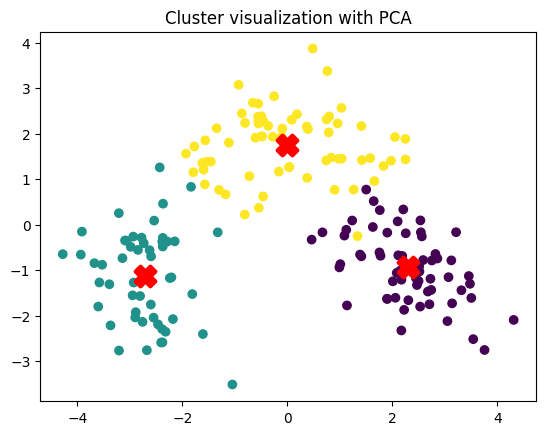

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Escalamos las categorías para que todo cuadre y no haya sesgos de escala. 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# B. Tenemos dos opciones, podemos hallarlo con el metodo Elbow o las silhouette scores, por lo tanto...
# Tiramos por el silhouette score. 
silhouette_scores = []
k_rango_silhouette = range(2, 11)

for k in k_rango_silhouette:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

optimal_k_silhouette = k_rango_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on silhouette score: {optimal_k_silhouette}') 
# Podemos ver que esto corresponde a lo que nos contaba el documento, que el numero de clasificacion son 3. 

# C.
# Ejecutamos KMeans con el numero optimo de centroides
model = KMeans(n_clusters=optimal_k_silhouette)
model.fit(data_scaled)
labels = model.labels_
centroids = model.cluster_centers_

# D. 
# Visualizacion usando PCA -> Util para cuando tenemos en consideración más de 2 dimensiones. 
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
centroids_pca = pca.transform(centroids)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.title('Cluster visualization with PCA')
plt.show()

# Tenemos un poco dificil hacer la evaluación del modelo, ya que en este dataset no se nos ha dado la columna target. Y por lo tanto no 
# podemos definir la exactitud que tiene. Pero podemos observar que hemos escalado los datos de manera correcta, y hemos averiguado
# el numero optimo de centroides con el silhouette score. 

### E: Extrae, a partir de visualizaciones, 3 características que diferencien un cluster de otro.


In [74]:
# Convertimos los centroides de vuelta al espacio de datos original: 
original_centroids = scaler.inverse_transform(centroids)
original_centroids_df = pd.DataFrame(original_centroids, columns=df.columns)

# Para cada cluster, debemos encontrar el valor medio de cada categoria y compararlo con la media global. 
# Las categorías con la mayor diferencia serán las más importantes a la hora de diferenciarlas. 
# Calculo de la media global 
global_mean = df.mean()

# Calculamos la media para cada cluster y las comparamos contra la media global. 
for i in range(optimal_k_silhouette): 
    cluster_mean = df[labels == i].mean()
    diff = cluster_mean-global_mean

    # Ordenamos las diferencias en valor absoluto y seleccionamos las 5 mayores
    top5_features = diff.abs().sort_values(ascending=False).head(3)
    
    #print(f"Diferencia en los valores medios para el cluster {i}:\n{diff}")
    print("\n =================== \n")
    print(f"Las 3 categorías con la mayor diferencia de la media global para el cluster {i} son:")
    print(top5_features)




Las 3 categorías con la mayor diferencia de la media global para el cluster 0 son:
Proline         363.746086
Magnesium         8.045312
Ash_Alcanity      2.212977
dtype: float64


Las 3 categorías con la mayor diferencia de la media global para el cluster 1 son:
Proline            127.834435
Color_Intensity      2.176616
Ash_Alcanity         1.746233
dtype: float64


Las 3 categorías con la mayor diferencia de la media global para el cluster 2 son:
Proline            237.408410
Magnesium            6.605209
Color_Intensity      2.039150
dtype: float64


### Visualizaciones - Dibujando la distribución de categorías para cada cluster nos dará un sentido de como varían.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

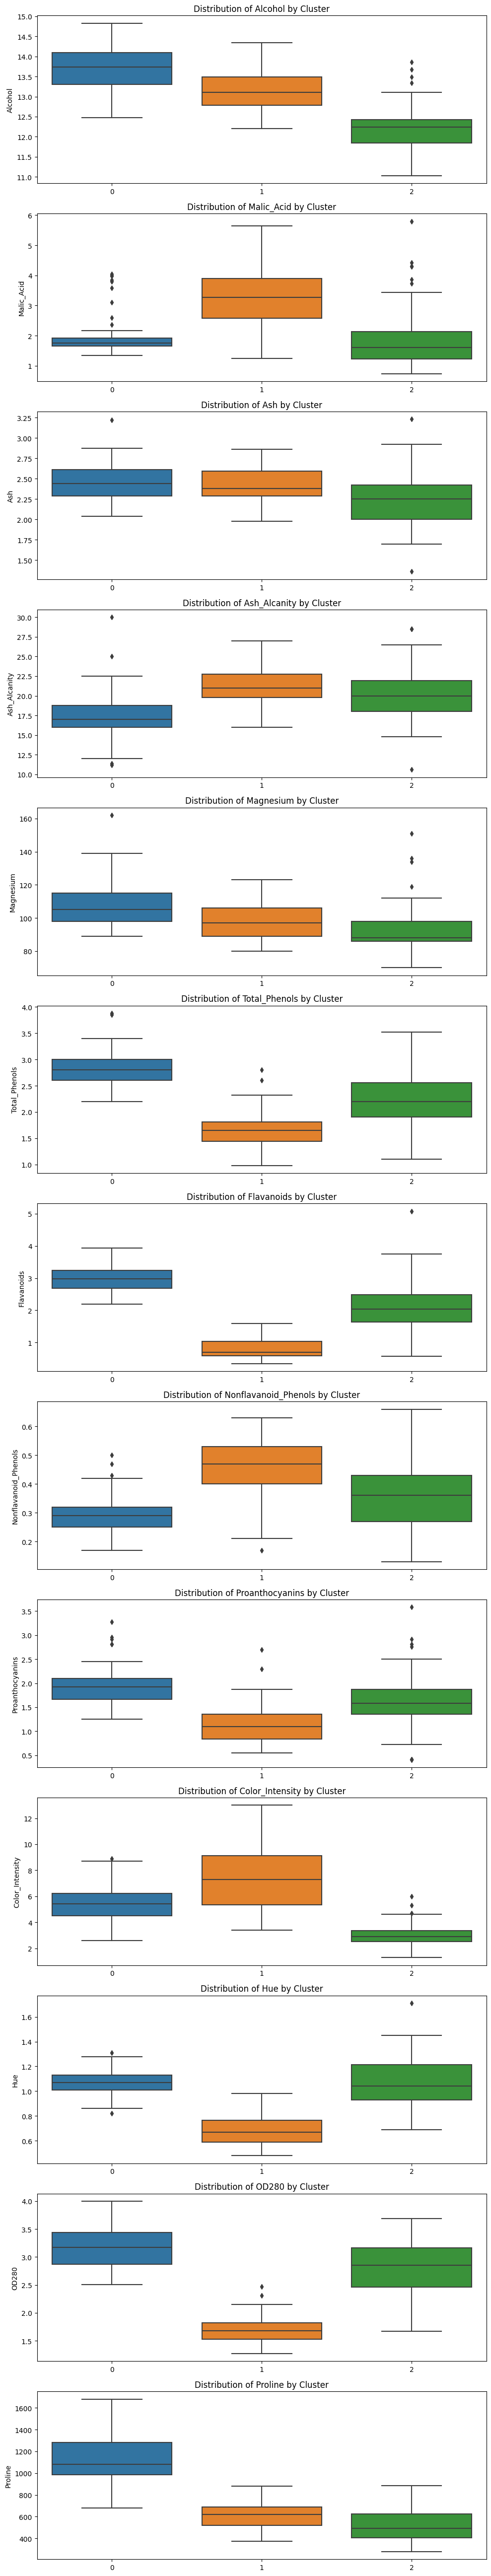

In [75]:
# Boxplots 
import seaborn as sns 
import matplotlib.pyplot as plt

#Example for one feature
#for col in df.columns: 
#    sns.boxplot(x=labels, y=df[col])
#    plt.title(f'Distribution of {col} by Cluster')
#    plt.show()

# Hacemos el subplot de manera dinamica. 
n_features = len(df.columns)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 4 * n_features))

for idx, col in enumerate(df.columns):
    sns.boxplot(x=labels, y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Cluster')

plt.tight_layout()
plt.show()

## Violin Plots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

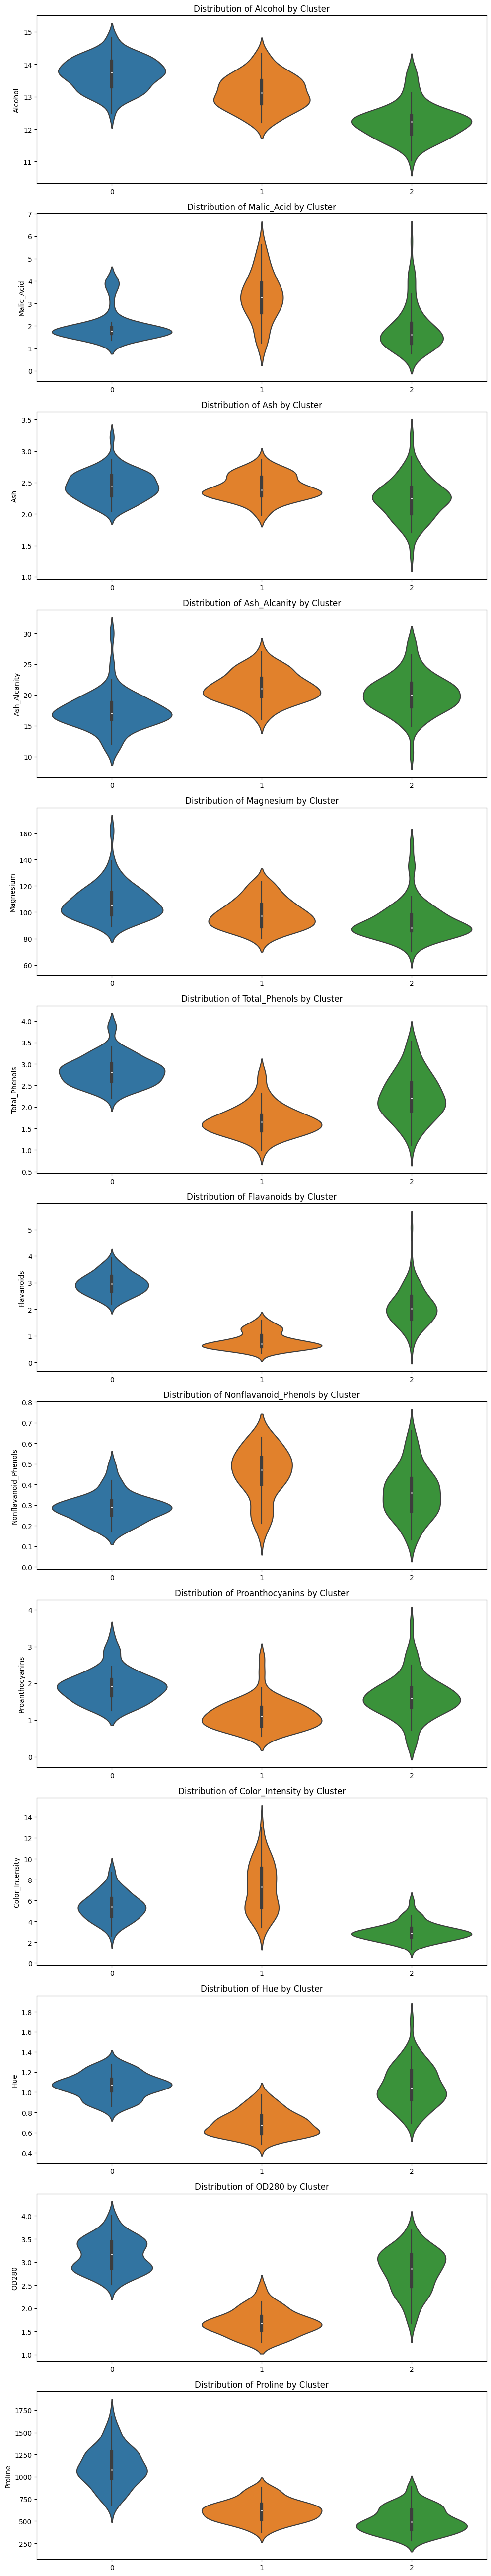

In [76]:
# Hacemos el subplot de manera dinamica. 
n_features = len(df.columns)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 4 * n_features))

for idx, col in enumerate(df.columns):
    sns.violinplot(x=labels, y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Cluster')

plt.tight_layout()
plt.show()

## Histograms

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

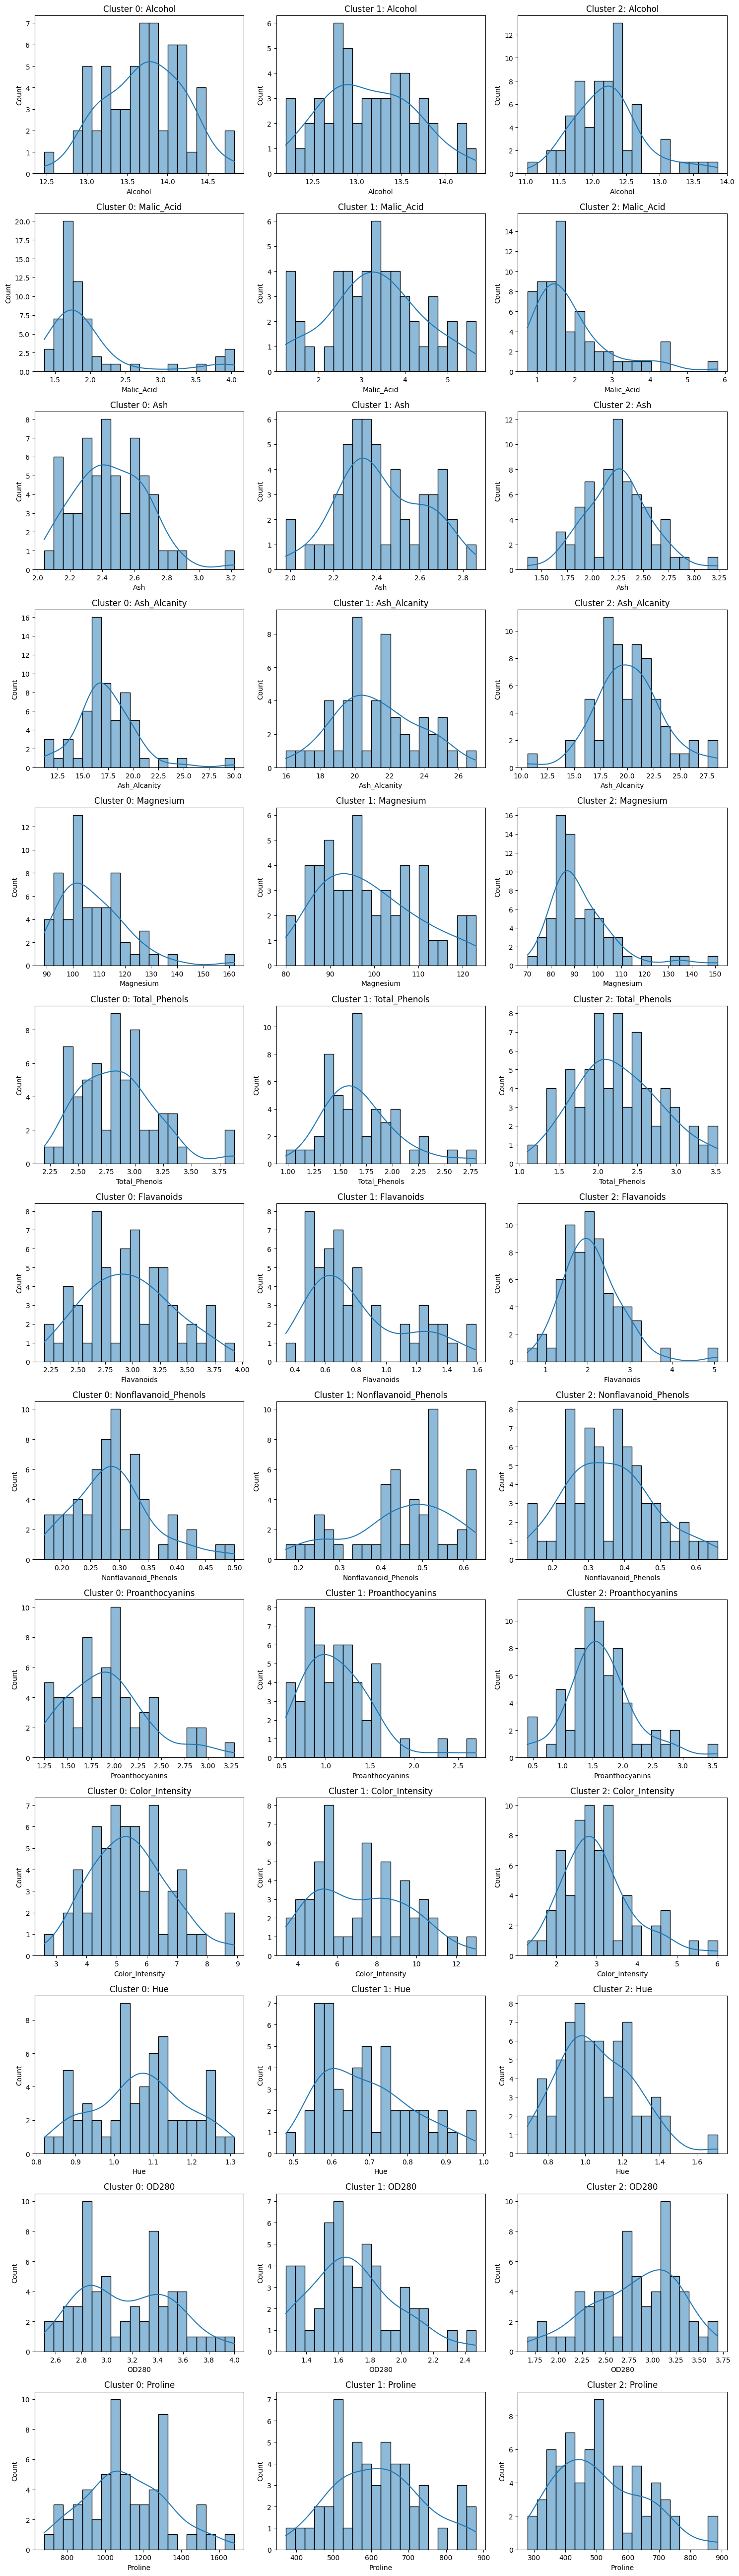

In [77]:
n_features = len(df.columns)
n_clusters = optimal_k_silhouette

fig, axes = plt.subplots(n_features, n_clusters, figsize=(15, 4 * n_features))

# Loop through each feature
for i, col in enumerate(df.columns):
    # Loop through each cluster
    for j in range(n_clusters):
        cluster_data = df[labels == j]
        sns.histplot(cluster_data[col], bins=20, kde=True, ax=axes[i, j])
        axes[i, j].set_title(f'Cluster {j}: {col}')

plt.tight_layout()
plt.show()


#### Caracterisiticas que definen los clusters de la manera más definida: 
1. Proline.
2. Acido Malico / Magnesio.
3. Intensidad del color. 

---

# Ejercicio 4 - Titanic:
A: Descarga y lee el csv de Titanic de https://www.kaggle.com/cities/titanic123

B: Realiza una gráfica para sacar la siguiente información:

1. ¿Cuál es la distribución de las edades de las mujeres que fallecieron en el barco?
2. ¿En qué proporción sobrevivieron los hombres, mujeres del barco?
3. ¿El barco priorizó salvar alguna clase (primera, segunda o tercera) en particular?
4. ¿Existe alguna franja de edad que se priorizara para salvarse?
5. Justifica por qué usas estas visualizaciones y realízalo todo en una única gráfica

In [78]:
#A. Descarga y lee el dataset contenido en el enlace
import pandas as pd 
df_titanic = pd.read_csv('titanic.csv')
#print(df_titanic.shape)
#print(df_titanic.info())
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


55.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


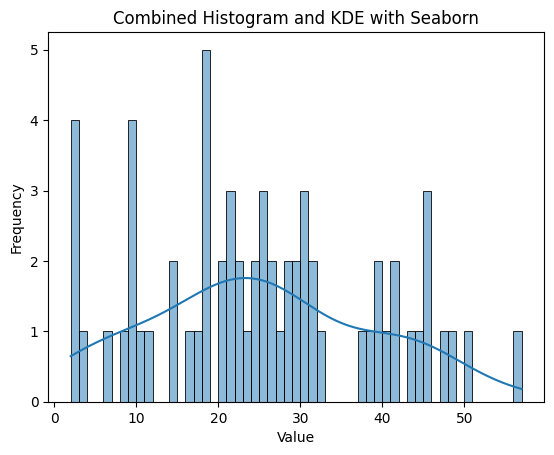

In [79]:
# 1. Cual es la distribución de las edades de las mujeres que fallecieron en el barco. 
# Vale, entonces debemos de filtrar. 1. Por mujer, 2. Por fallecidos
# Filtramos las filas donde 'Value1' es mayor a 20
df_titanic_female = df_titanic[df_titanic['Sex']== 'female']
df_titanic_female_died = df_titanic_female[df_titanic_female['Survived'] == 0]
df_titanic_female_died.head()

age_female_died_range = df_titanic_female_died['Age'].max() - df_titanic_female_died['Age'].min()
print(age_female_died_range)

sns.histplot(df_titanic_female_died['Age'], bins=55, kde=True)
plt.title("Combined Histogram and KDE with Seaborn")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


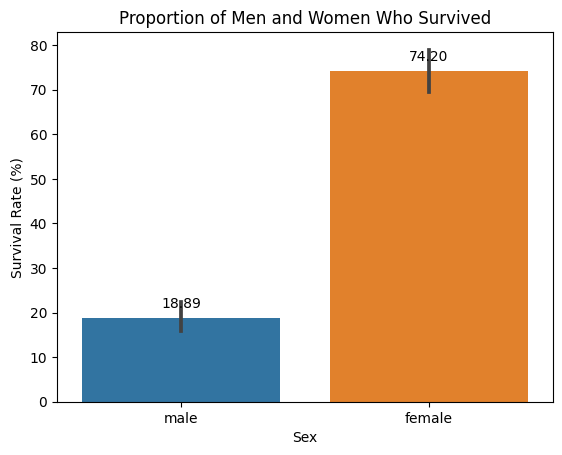

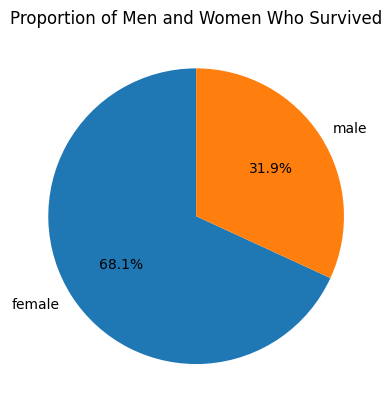

In [80]:
#2. ¿En qué proporción sobrevivieron los hombres, mujeres del barco?
df_titanic.head()

df_titanic_survived_gender = df_titanic[['Sex','Survived']]

# Bar Chart (%) - De los hombre y de las mujeres - que porcentaje sobrevivieron correspondente a cada genero?
# Create the bar plot
ax = sns.barplot(x='Sex', y='Survived', data=df_titanic_survived_gender, estimator=lambda x: sum(x==1)*100.0/len(x))
# Lo del estimator sobra, pero si te interesa ponerlo:
"""The estimator is set to a lambda function that calculates the percentage of survivors in each category ("male" and "female"). This lambda function works as follows:
    - sum(x==1): Counts the number of survivors (where Survived is 1).
    - len(x): Counts the total number of passengers in that category.
    - sum(x==1)*100.0/len(x): Calculates the percentage of survivors."""

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Proportion of Men and Women Who Survived')
plt.ylabel('Survival Rate (%)')
plt.show()

#-----------------------------
# WITHOUT THE LABELS INSIDE THE BAR BUT A LOT SIMPLER
#sns.barplot(x='Sex', y='Survived', data=df_titanic_survived_gender)
#plt.title('Proportion of Men and Women Who Survived')
#plt.ylabel('Survival Rate (%)')
#plt.show()

# Pie Chart - De todos los pasajeros que sobrevivieron, cuales eran hombres y cuales eran mujeres. 
sex_survived = df_titanic_survived_gender[df_titanic_survived_gender['Survived'] == 1]['Sex'].value_counts()
plt.pie(sex_survived, labels = sex_survived.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Men and Women Who Survived')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


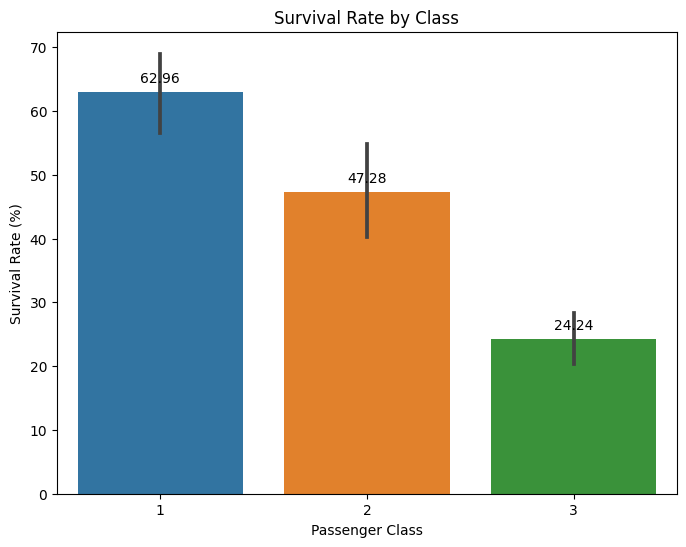

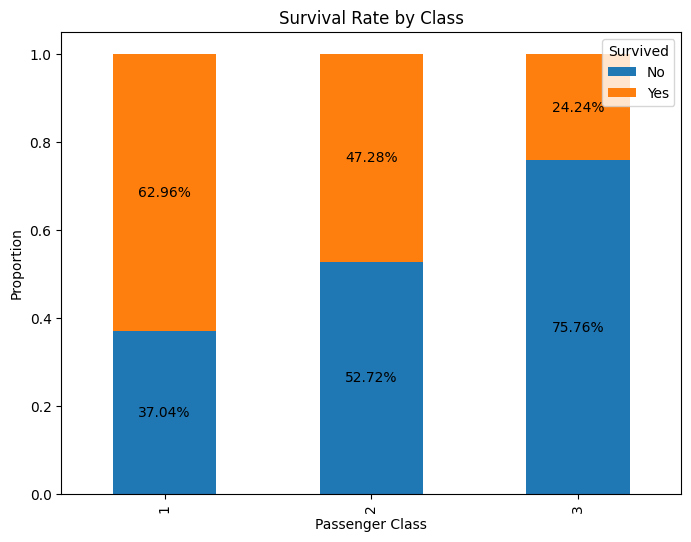

In [81]:
# 3. ¿El barco priorizó salvar alguna clase (primera, segunda o tercera) en particular?
# Tenemos que ver la distribución de clases de aquellos que sobrevivieron en un bar chart, no?

# Normal Bar Chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Pclass', y='Survived', data=df_titanic, estimator=lambda x: sum(x==1)*100.0/len(x))

for p in ax.patches: 
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0,10), textcoords='offset points')
    
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')
plt.show()

##############################################################

# Create a sample data to demonstrate
# Replace this sample with your actual DataFrame, 'titanic_df'

# Calculate proportions for stacked bar chart
class_survival = df_titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)

# Stacked Bar Chart with Correct Annotations
fig, ax = plt.subplots(figsize=(8, 6))
class_survival.plot(kind='bar', stacked=True, ax=ax)

# Initialize a variable to store the starting point of each bar segment
y_offset = [0, 0, 0]  # There are 3 classes

# Add labels for proportions
for i, (colname, values) in enumerate(class_survival.items()):
    for j, value in enumerate(values):
        label = f"{value:.2%}"
        ax.text(j, y_offset[j] + value / 2, label, ha='center', va='center')
        y_offset[j] += value  # Update the starting point for the next segment

plt.title('Survival Rate by Class')
plt.ylabel('Proportion')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


###############################################################

# Normal Stacked BarChart, no labels
# class_survival = df_titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)
# class_survival.plot(kind='bar', stacked=True, figsize=(8, 6))
# plt.title('Survival Rate by Class')
# plt.ylabel('Proportion')
# plt.xlabel('Passenger Class')
# plt.legend(title='Survived', labels=['No', 'Yes'])
# plt.show()

79.58


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


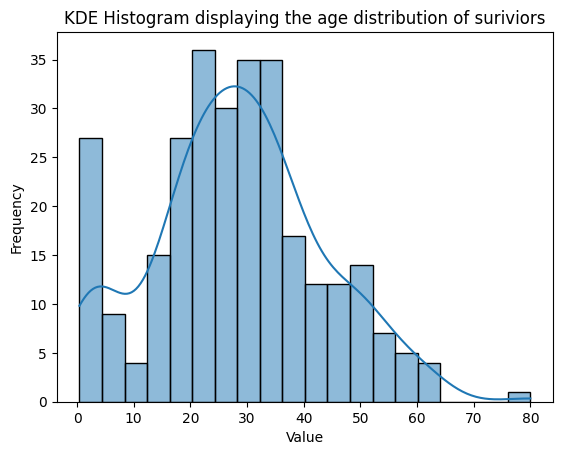

In [82]:
# 4. ¿Existe alguna franja de edad que se priorizara para salvarse?
# Esto suena a histograma. Yey

df_titanic_survived = df_titanic[df_titanic['Survived']== 1]
df_titanic_survived.head()
#Calculo para ver el numero de bins apropiados a
df_titanic_survived_age_range = df_titanic_survived['Age'].max() - df_titanic_survived['Age'].min()
print(df_titanic_survived_age_range)

sns.histplot(df_titanic_survived['Age'], bins=20, kde=True)
plt.title("KDE Histogram displaying the age distribution of suriviors")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


## Todo en una gráfica: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

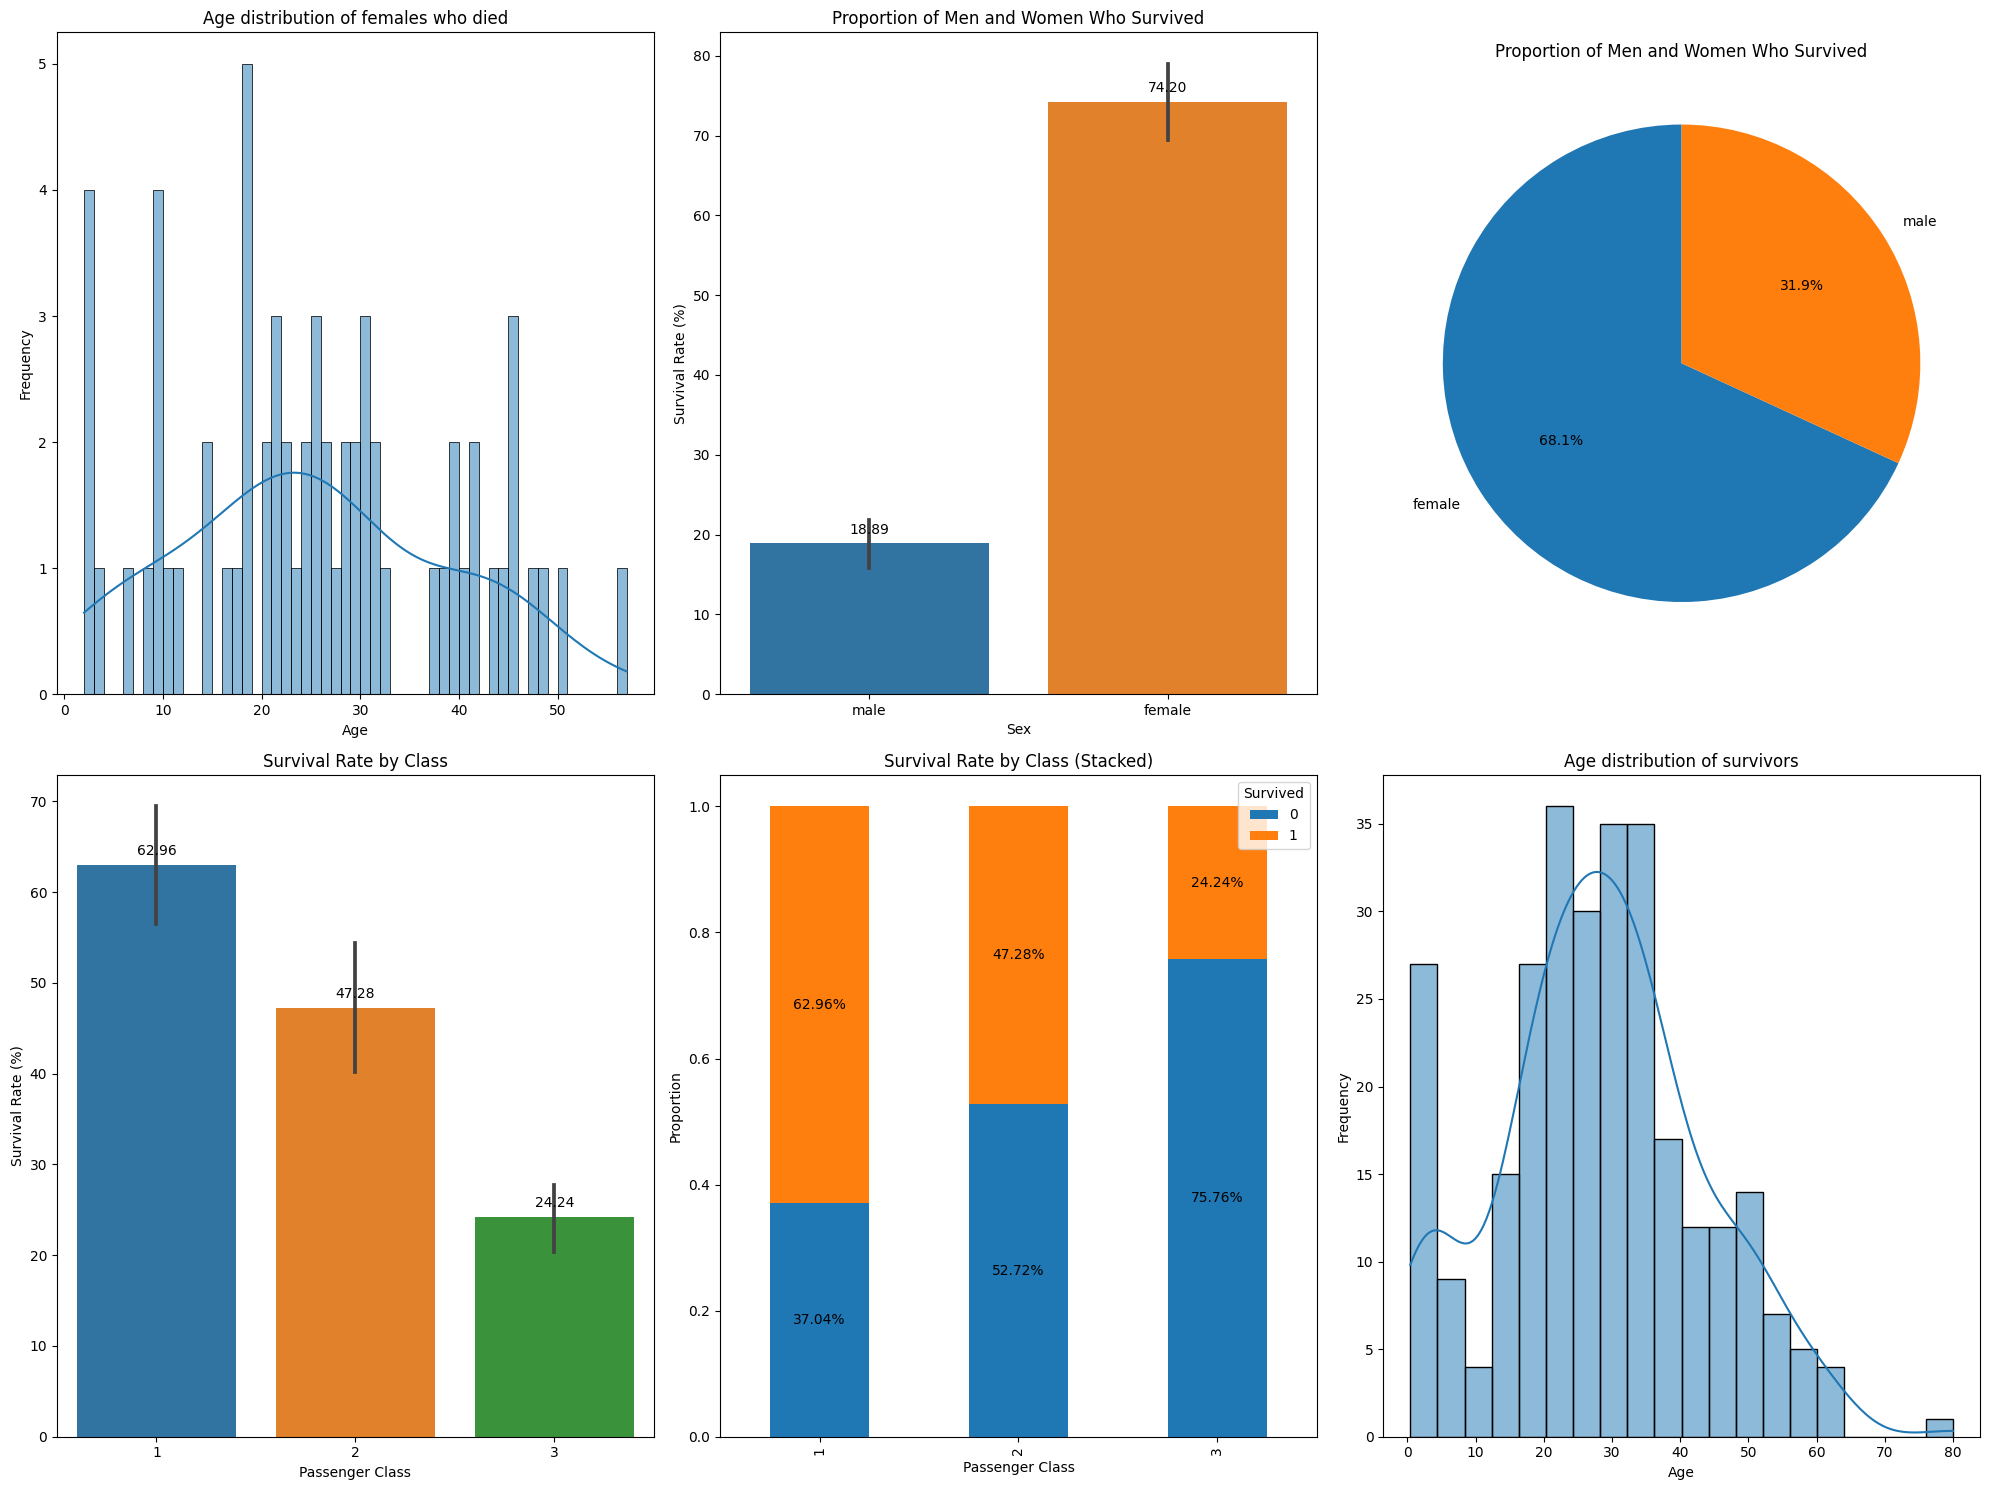

In [84]:
# To fit all 6 plots, we'll create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# 1. Histogram for age distribution of females who died
sns.histplot(df_titanic_female_died['Age'], bins=55, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age distribution of females who died")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# 2. Bar chart for proportion of men and women who survived
sns.barplot(x='Sex', y='Survived', data=df_titanic_survived_gender, estimator=lambda x: sum(x==1)*100.0/len(x), ax=axes[0, 1])
# Add labels inside the bars
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

axes[0, 1].set_title('Proportion of Men and Women Who Survived')
axes[0, 1].set_ylabel('Survival Rate (%)')

# 3. Pie chart for proportion of men and women who survived among all survivors
sex_survived = df_titanic_survived_gender[df_titanic_survived_gender['Survived'] == 1]['Sex'].value_counts()
axes[0, 2].pie(sex_survived, labels = sex_survived.index, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Proportion of Men and Women Who Survived')

# 4. Bar chart for survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df_titanic, estimator=lambda x: sum(x==1)*100.0/len(x), ax=axes[1, 0])
# Add labels inside the bars
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height():.2f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

axes[1, 0].set_title('Survival Rate by Class')
axes[1, 0].set_ylabel('Survival Rate (%)')
axes[1, 0].set_xlabel('Passenger Class')

# 5. Stacked bar chart for survival rate by class
class_survival = df_titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack().fillna(0)
class_survival.plot(kind='bar', stacked=True, ax=axes[1, 1])

# Initialize a variable to store the starting point of each bar segment
y_offset = [0, 0, 0]  # Considering there are 3 classes

# Add labels for proportions
for i, (colname, values) in enumerate(class_survival.items()):
    for j, value in enumerate(values):
        label = f"{value:.2%}"
        axes[1, 1].text(j, y_offset[j] + value / 2, label, ha='center', va='center')
        y_offset[j] += value  # Update the starting point for the next segment

axes[1, 1].set_title('Survival Rate by Class (Stacked)')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].set_xlabel('Passenger Class')

# 6. Histogram for age distribution of all survivors
sns.histplot(df_titanic_survived['Age'], bins=20, kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Age distribution of survivors")
axes[1, 2].set_xlabel("Age")
axes[1, 2].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()